### **train과 test**

train은 가중치를 찾아가는 과정으로, 시행마다 특정 가중치를 가지고 train set를 넣었을 때,

예측 값과 정답을 비교해서 loss를 산출하고 loss를 줄여가면서 학습을 반복하여 loss가 가장 낮았던 가중치 또는 가장 마지막에 시행된 가중치를 선정

선정된 가중치를 기반으로 test set에 적용하여 모델을 생성

**→ train 정확도와 test 정확도 사이의 간극이 작을수록 일반화가 잘 된 모델임**

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_labels[:3] # 지도학습

array([9, 0, 0], dtype=uint8)

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
60000

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

## 데이터 전처리

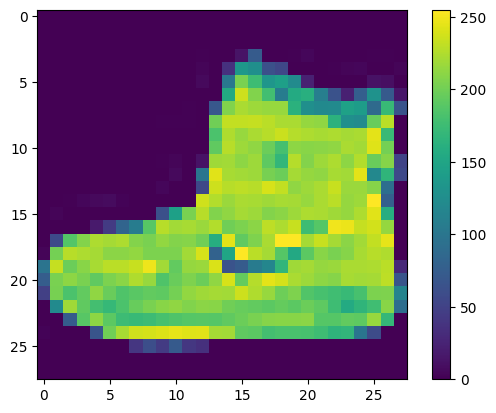

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images[:1] # 픽셀값 255로 나누기 전 (범위 : 0~255)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### 데이터 Scaling (모델의 학습 성능을 높이기 위해)
##### - 값의 범위가 너무 크면 특정 값에 초점이 맞춰질 수 있음(이상치 핸들링 가능)
##### - 변수 간 범위를 맞춰서 특정 데이터에 쏠림 방지 + 학습 속도 향상 (변수 간 통일 ****)

In [14]:
train_images[:1] # 픽셀값 255로 나눈 후(범위 : 0~1)

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

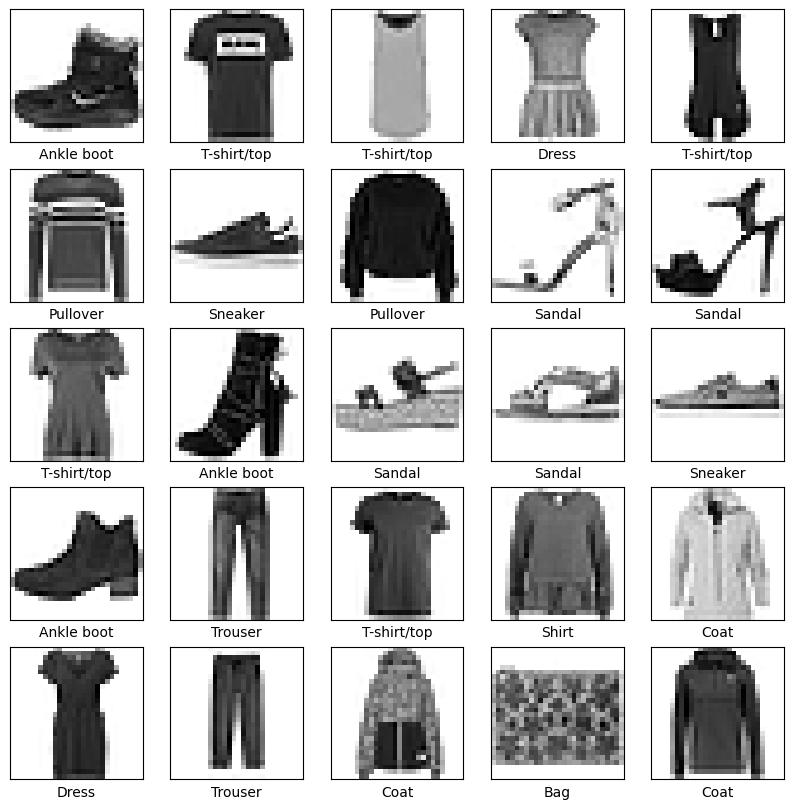

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Activation
#### - sigmoid와 relu
<br>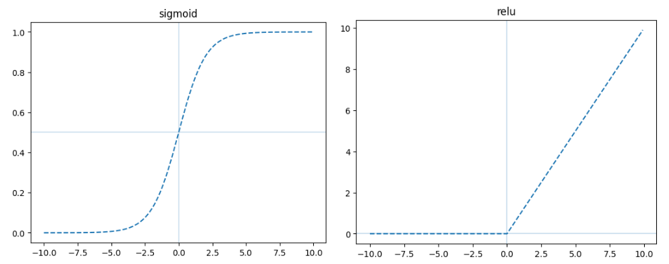

In [25]:
model = tf.keras.Sequential([ # 시계열 인공신경망
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 784
    tf.keras.layers.Dense(128, activation='relu'),  # 0보다 크면 그대로 반환, 음수의 경우 0 반환
    # 128 : 하이퍼 파라미터 값(256 / 2)
    tf.keras.layers.Dense(10, activation='softmax') # 한 set에서 가장 큰 값을 골라서 1로 나머지는 0으로 처리
])  # 10 : 하이퍼 파라미터 값


c:\Users\sjbang\anaconda3\envs\tf\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### optimizer

In [26]:
# 모델을 생성 시 최적화를 진행하기 위한 과정

model.compile(optimizer='adam', # 옵티마이저 : 더 나은 결과가 가능한지 새로운 매개변수 생성
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss : 결과가 나쁜지 좋은지 판단하는 기준 - 에러값
              metrics=['accuracy']) # 정확도

# loss가 낮아질수록 정확도는 향상

In [27]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6760 - loss: 12.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7204 - loss: 0.7402
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7613 - loss: 0.6388
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7944 - loss: 0.5593
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8113 - loss: 0.5399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8212 - loss: 0.5100
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8284 - loss: 0.4895
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8323 - loss: 0.4918
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8308 - loss: 0.4962
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8341 - loss: 0.4894


In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8020 - loss: 0.5611

Test accuracy: 0.8019999861717224


### 오버피팅(overFitting)
#### - train 데이터에 너무 맞게 학슴 됨을 의미(train 정확도가 너무 높을때)
#### - train 정확도 : 0.83 | test 정확도 : 0.80

In [29]:
# 예측하기
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


In [30]:
predictions[0]

array([1.2918094e-16, 4.0199281e-11, 0.0000000e+00, 4.0769016e-13,
       0.0000000e+00, 9.3716606e-03, 7.3840452e-25, 8.2035065e-02,
       6.8747855e-11, 9.0859324e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

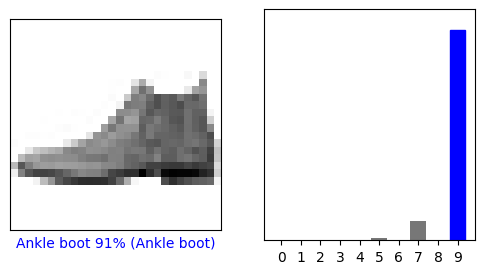

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

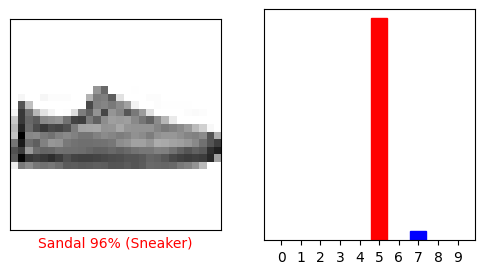

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

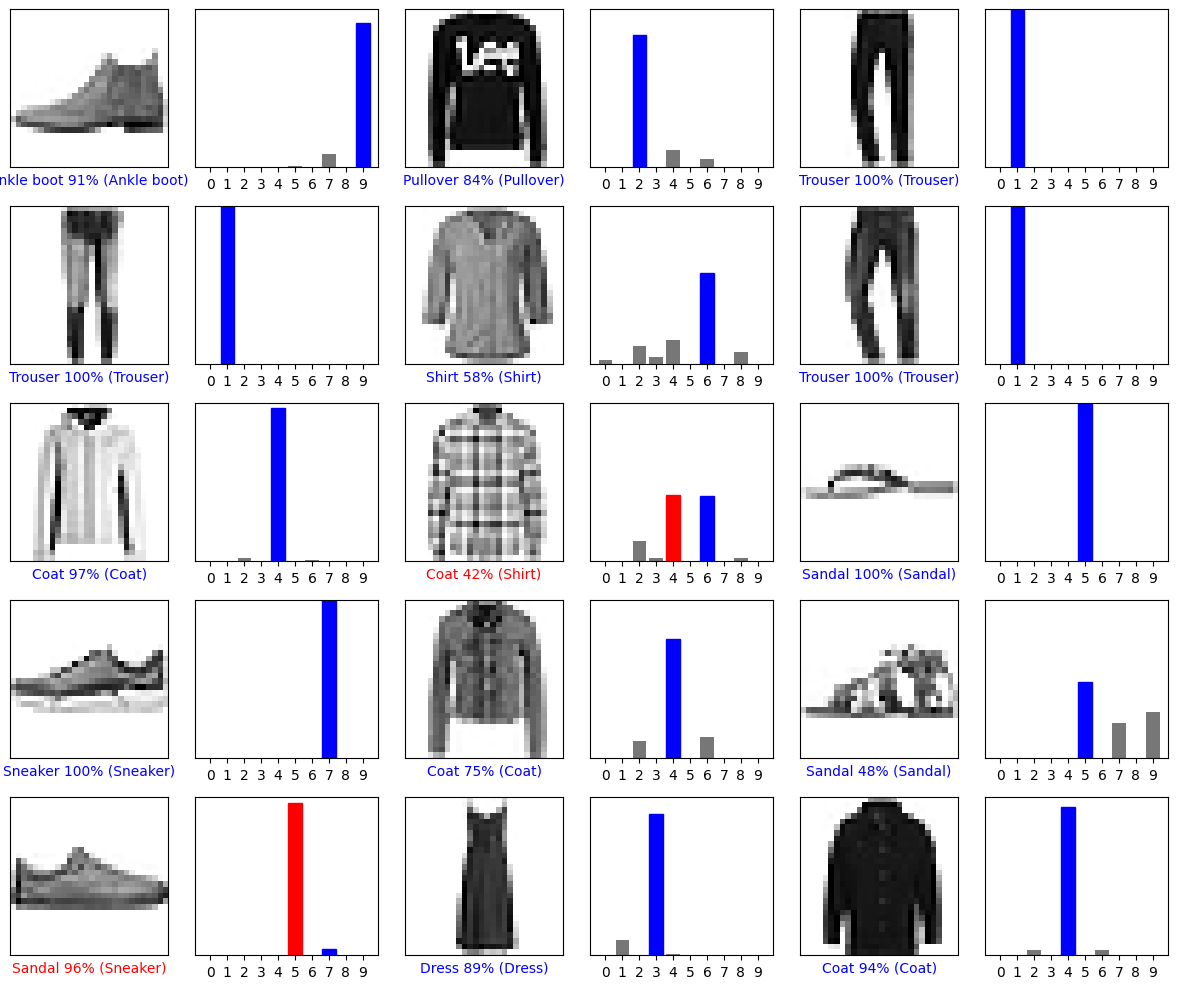

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
# 훈련된 모델 사용하기
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[3.1389893e-05 4.9504935e-11 8.3746636e-01 1.8042838e-04 1.1078339e-01
  2.8232883e-27 5.1396571e-02 0.0000000e+00 1.4183397e-04 0.0000000e+00]]


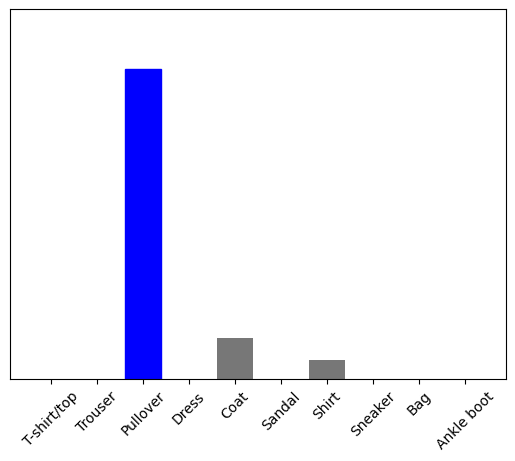

In [40]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [41]:
np.argmax(predictions_single[0])

2